In [1]:
from timelagged import TICA
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-09-02 15:28:27.387553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-02 15:28:27.405499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-02 15:28:27.409866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-02 15:28:27.422287: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-02 15:28:28.178850: W tensorflow/compiler/tf2

In [48]:
tr = '../DE-Shaw/trpcage_red.xtc'
conf ='../DE-Shaw/trpcage_correct.pdb'

In [49]:
import mdtraj as md
import numpy as np
from deeptime.decomposition import TICA

# Carico la traiettoria
traj = md.load(tr, top=conf)

# Seleziono gli atomi Cα
ca_indices = traj.topology.select("protein")

# Estraggo le coordinate
X = traj.xyz[:, ca_indices, :].reshape(traj.n_frames, -1)  # (frames x features)

# Definisco TICA
tica = TICA(lagtime=10, dim=2)

Y = tica.fit_transform(X)
np.save("tica3.npy", Y)

print("Shape delle coordinate TICA:", Y.shape)


Shape delle coordinate TICA: (52200, 2)


In [58]:
rmsd = md.rmsd(traj, traj, 0)

In [65]:
len(Y[:,0])

52200

Text(0.5, 1.0, 'Tica 2')

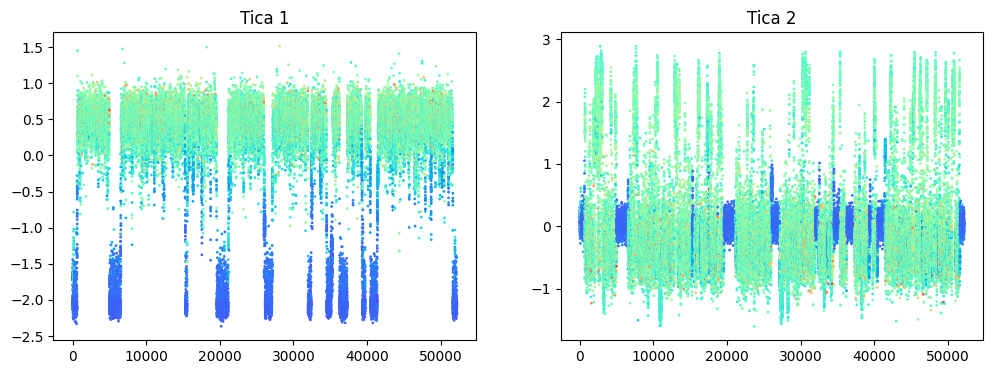

In [73]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(np.arange(len(Y[:,0])), Y[:,0], c=rmsd, cmap="rainbow", s=1)
plt.title("Tica 1")
plt.subplot(122)
plt.scatter(np.arange(len(Y[:,0])), Y[:,1], c=rmsd, cmap="rainbow", s=1)
plt.title("Tica 2")

Text(0.5, 1.0, 'Tica 1 vs Tica 2 by rmsd')

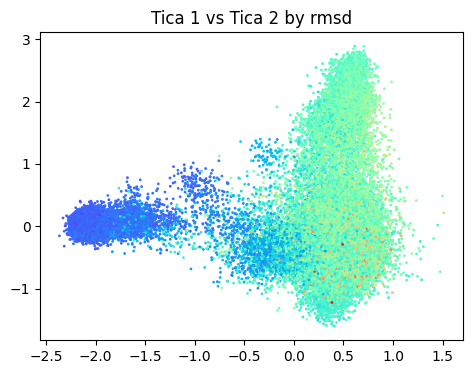

In [76]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(Y[:,0], Y[:,1], c=rmsd, cmap="rainbow", s=1)
plt.title("Tica 1 vs Tica 2 by rmsd")

In [87]:
import numpy as np
tica = np.load("../ASMSA_DE/tica3.npy")

idx = np.argmax(tica[0:20000, 1])  
val = tica[idx, 1]           

print("Time:", idx)
print("Value:", val)


Time: 2758
Value: 2.8854720194342303


In [86]:
import nglview as nv

v = nv.show_mdtraj(traj)
v.clear()
v.add_representation("licorice")
v.add_representation("cartoon")
v

NGLWidget(max_frame=52199)